# Chevron Data Science Challeng: Predicting Production

We are tasked with the challenge to develop a data-driven model for production as a function of geology and engineering design. We are given the **base** spreadsheets, the **geology** files, and the **completions** data along with a **data dictionary** which defines the features included. 

A general outline of my approach to this multi-variate analysis (MVA) project will be:
1) Familiarize myself with the data and perform an exploratory data analysis
2) Take the training dataset and build a regression algorithm to predict EUR
3) Provide some recommendations for future work

## Prelude to the challenge
"This was an internal data science challenge within Chevron and what we’re looking for is for you to review and provide feedback on how you would approach this challenge (methodology) and how you would present your finding to the business (stakeholders). There is not an expectation that you complete the challenge, but rather as a data scientist how would you approach this problem."

# Exploratory Data Analysis (EDA) for Chevron Wolfcamp MVA Project

The key of an MVA project is to build a predictive model capable of interpolating EOR as a function of geological and completions parameters on a multidimensional space populated with samples from a Wolfcamp field. Specifically, we would like to know an expected value of EUR, given a desired set of geological and completions parameter values. In order to build an efficient model, a first step should always be familiarizing oneself with the data.

Therefore, in this EDA I would like to interactively explore the data, in order to see what parameters are available, their ranges, distributions, proportions of outliers, and whether they are related to the actual production.

# Load libraries and data

First, lets start with loading the essential set of libraries and data itself. Visuals will be mainly done by **seaborn & matplotlib**, data will be stored in **pandas** dataframes.

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
%matplotlib inline

def read_data(part = 'training'):
    if not(part in ['training','test']):
        print('Not a valid part argument')
        return None,None,None
    # Load the csvs below:
    geo = pd.read_csv('./geology_%s.csv' % part)
    base = pd.read_csv('./base_%s.csv' % part)
    comp = pd.read_csv('./completions_%s.csv' % part)
    
    return geo,base,comp

In [29]:
geo_train,base_train,comp_train = read_data('training')
geo_test,base_test,comp_test = read_data('test')
base_train.head()

,WellID,Subarea,Operator,County,Completion.Date,Completion.Year,Surface.Latitude,Surface.Longitude,Depth.Total.Driller..ft.,WB.Spacing.Proxy,...,Between_Zone,Frac.Stages,Treatment.Records,Fluid.Water..Gals.,Acid..Gals.,Gel.x.link..Gals.,Other..Gals.,Proppant...Total..lbs.,Fluid...Total..Gals.,EUR_o..Mstb.
0,2,E,PIONEER NATURAL RESOURCES USA INC,GLASSCOCK,37698,2003,31.65753,-101.72135,8550,160,...,SPBR_U --> WFMP,3.0,6,0.0,3500.0,187446.0,0.0,471330.0,190946.0,40.200000
1,3,D,PIONEER NATURAL RESOURCES USA INC,GLASSCOCK,37698,2003,31.71566,-101.71787,8550,40,...,CLFK --> WFMP,3.0,8,0.0,5000.0,201390.0,0.0,476570.0,206390.0,39.050383
2,5,D,ENDEAVOR ENERGY RESOURCES LIMITED PRTS,GLASSCOCK,38022,2004,31.95401,-101.74911,10500,20,...,CLFK --> WFMP,1.0,1,334900.0,0.0,0.0,0.0,553020.0,334900.0,51.856000
3,7,F,ENDEAVOR ENERGY RESOURCES LIMITED PRTS,GLASSCOCK,37714,2003,31.70024,-101.52357,8900,80,...,CLFK --> WFMP,1.0,1,247212.0,0.0,0.0,0.0,265000.0,247212.0,22.156000
4,10,E,PIONEER NATURAL RESOURCES USA INC,GLASSCOCK,37733,2003,31.69134,-101.72307,8575,Over 160,...,SPBR_U --> WFMP,3.0,8,0.0,5000.0,196636.0,0.0,318180.0,201636.0,45.276000


In [49]:
geo_train.head()

,WellID,CLFK..KHW.,U_SPBR..KHW.,L_SPBR..KHW.,WFMP..KHW.,WFMP_L..KHW.,WFMP_ATB..KH,CLINE..KHW.,STRN..KHW.,ATOK..KHW.,...,WOLFCAMP_L..,WFMP_ATB..MA,CLINE..MAP.,STRAWN..MAP.,ATOKA..MAP.,BEND..MAP.,ATOKA_L..MAP,MISSISSIPPIA,WOODFORD..MA,DEVINOAN_UNC
0,2,NaN,6804.0,7377.0,8402.0,NaN,NaN,NaN,NaN,NaN,...,8656.68,9117.13,10064.14,10401.03,10549.76,10605.62,10753.48,10994.41,11166.23,11218.13
1,3,NaN,6835.0,7373.0,8396.0,NaN,NaN,NaN,NaN,NaN,...,8655.04,9065.50,10017.55,10334.61,10479.53,10565.34,10709.51,10953.88,11091.11,11161.15
2,5,5716.0,6778.0,7378.0,8348.0,8619.0,8981.0,9811.0,10222.0,NaN,...,8611.11,8983.29,9809.59,10194.60,10268.80,10275.69,10297.00,10622.81,10815.38,10866.76
3,7,5266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8192.68,8394.65,9475.90,9808.25,9926.03,10056.55,10103.16,10244.89,10382.44,10426.28
4,10,5792.0,6829.0,7366.0,8390.0,NaN,NaN,NaN,NaN,NaN,...,8656.19,9133.99,10050.20,10368.02,10515.05,10590.94,10729.45,10995.26,11136.53,11201.25


In [50]:
comp_train.head()

,WellID,Number,Type,Depth Top,Depth Base,Fluid Amount,Fluid Units,Fluid Type,Propping Agent Amount,Propping Agent Units,Propping Agent Type,Pressure Breakdown,Injection Rate,Additive,Mesh Size,Remark
0,2,1,FRAC,8213,8429,64176.0,GAL,X-LINKGEL,155000.0,LB,SAND,NaN,NaN,NaN,20/40,BORATE GEL
1,2,2,ACID,8213,8429,1500.0,GAL,A,0.0,undefined,undefined,1800.0,NaN,HCL,NaN,15%
2,2,3,FLSH,8213,8429,1000.0,GAL,A,0.0,undefined,undefined,NaN,23.2,NaN,NaN,7.5% ACROSS L SPBY; 2 DRUMS SCALE INHIBITOR IN...
3,2,6,FRAC,7479,7749,68712.0,GAL,X-LINKGEL,180000.0,LB,SAND,NaN,NaN,NaN,20/40,20# BORATE; SPEARHEAD W/1000 GAL 7.5% HCL; 2 D...
4,2,4,FLSH,6825,7004,1000.0,GAL,A,0.0,undefined,undefined,NaN,25.6,NaN,NaN,7.5% ACROSS U SPBY INTERVAL


Start by plotting the well locations and organizing by subarea

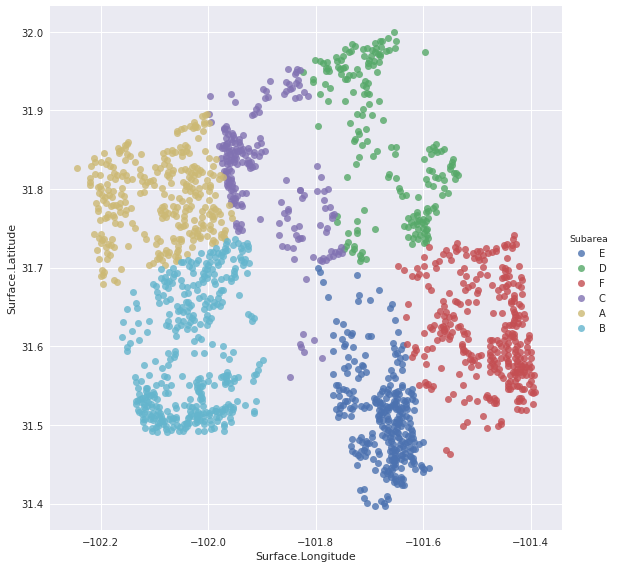

In [30]:
sns.lmplot(x="Surface.Longitude",y="Surface.Latitude",data = base_train,fit_reg = False,hue = 'Subarea',size = 8)

Look like we have quite distinct spatial clusters described by Subarea variable. This is important for the 
crossvalidating the model. Specifically, if in reality we are interested in the well performances around a specific area where no wells are drilled, our model should be able to generalize fairly well. **Therefore, during crossvalidation we should make sure folds are constructed such that the validation wells are within one subarea, and none of training wells include wells from that area per that fold.** Otherwise we risk leaking information between the test and train sets. After crossvalidation we pick the best model and only *then* will train on the whole **dataset !**

# Profiling the dataframes

Because we have big dataframes, the exhaustive EDA might take too many lines of code. However, there is a great package called **pandas-profiler** that does this job for you. Therefore we ll just do the most basic profiling using its powers:

In [41]:
# Not going to run cell to suppress output due to missing windows fonts.
# The output from this cell is *_train_report.html

#import pandas_profiling as pd_pf

#for df,name in zip((base_train,geo_train,comp_train),('base','geo','comp')):
#    profile = pd_pf.ProfileReport(df,bins=40,check_correlation = False)
#    profile.to_file(outputfile="./%s_train_report.html" % name)
#    print(name)

In [32]:
base_train.dtypes # just to show that the object variables will need to be specified using .astype

WellID                        int64
Subarea                      object
Operator                     object
County                       object
Completion.Date               int64
Completion.Year               int64
Surface.Latitude            float64
Surface.Longitude           float64
Depth.Total.Driller..ft.      int64
WB.Spacing.Proxy             object
SPBY.Spacing.Proxy           object
Deepest_Zone                 object
Between_Zone                 object
Frac.Stages                 float64
Treatment.Records             int64
Fluid.Water..Gals.          float64
Acid..Gals.                 float64
Gel.x.link..Gals.           float64
Other..Gals.                float64
Proppant...Total..lbs.      float64
Fluid...Total..Gals.        float64
EUR_o..Mstb.                float64
dtype: object

Voila! Now the results are stored in htmls within the folder. I cannot seem to get the statistics or 

### Base train:

- Impute Acid.Gals with 0 ?
- Might want to transform predictor to a more normal-looking distribution. Maybe not if using forests
- Fluid gals is super skewed, needs a transform (log transform or box-cox)
- Gel Link needs same as above
- Operator is quite fragmented...Not sure what to do with it. Random Forests will take care given we train a lot of trees
- OtherGals is useless, looks like. Low variance variable
- ProppantTotal seems to have strong outliers; otherwise logtransform is necessary.
- Subarea use for crossvalidation as a stratifier!
- Where is the promised **direction** column ?
Correlation matrix is looking quite interesting..Nothing except fro proppant and total fluid is in any correlation; the two are weakly correlated (makes sense).

### Geo train

- Formation picks are mainly missing; interpolated map intersections with wells have weird outliers, need to be taken care of, potentially an artefact of interpolatino in Petrel
- MPLW KHW is a constant, throwing it away
- As the MAP and the picks correlate very well, no need to replace MAP values with picked, because the fraction of NA is much greated than fraction of picks in the picks columns

### Comp train

- Missing additive values should potentially be treated as 'non-specified'
- Depth_Top or Base should tell where the lateral starts for correction of EUR
- Fluid amount skewed
- Fluid units are important for correction! But unnecessary for prediction !
- Mesh size has a lot of values missing....We ll try to do a model with and without it, using the subset of wells
- Same for pressure breakdown
- Proppant agent amount has too many 0s
- Proppant agent type will most likely be a useless variable (undefined category is large %)
- Remark can be thrown out - useless variable
- Looks like for each well there are multiple treatment records; and they are compiled in the base_train using **sum** aggregation

### TODO

- Find proxy for well length / pay exposure length. Most likely BetweenZone column need to be parsed, and then a difference between the picks can be calculated
- Need to merge EUR from base with Comp to look at the correlation
- Need to merge EUR from base with GEO ..


# Stage & treatment records summary issue

Exploratory analysis showed that Frac Stages parameter has a weird exponential distribution, with most common value of Frac Stage == 1. That might seem suspicious, since generally wells are stimulated in a multistage fashion. if that's the case, then we need to fix the error in the **base_train** by calculating the number of stages from **comp_train**.

It also looks like the Fluid.Total and Proppant Total, as well as Acid Gals are not computed correctly in the summary table.

Here's the example for a WellID == 26:

In [33]:
comp_train[comp_train['WellID'] == 26]

,WellID,Number,Type,Depth Top,Depth Base,Fluid Amount,Fluid Units,Fluid Type,Propping Agent Amount,Propping Agent Units,Propping Agent Type,Pressure Breakdown,Injection Rate,Additive,Mesh Size,Remark
83,26,1,ACID,7972,8185,1500.0,GAL,A,0.0,undefined,undefined,NaN,NaN,HCL,NaN,7 1/2%
84,26,2,FRAC,7972,8185,63798.0,GAL,X-LINKGEL,155828.0,LB,SAND,NaN,31.5,NaN,20/40,30# BORATE
85,26,3,ACID,7124,7597,2000.0,GAL,A,0.0,undefined,undefined,NaN,NaN,HCL,NaN,7 1/2%
86,26,4,FRAC,7124,7597,76062.0,GAL,X-LINKGEL,181069.0,LB,SAND,NaN,31.0,NaN,20/40,20# BORATE
87,26,5,ACID,6507,6683,1500.0,GAL,A,0.0,undefined,undefined,NaN,NaN,HCL,NaN,7 1/2%
88,26,6,FRAC,6507,6683,54642.0,GAL,X-LINKGEL,134833.0,LB,SAND,NaN,32.0,NaN,20/40,20# BORATE


In [34]:
base_train[base_train["WellID"] == 26].drop(['Operator','County'],axis=1)

,WellID,Subarea,Completion.Date,Completion.Year,Surface.Latitude,Surface.Longitude,Depth.Total.Driller..ft.,WB.Spacing.Proxy,SPBY.Spacing.Proxy,Deepest_Zone,Between_Zone,Frac.Stages,Treatment.Records,Fluid.Water..Gals.,Acid..Gals.,Gel.x.link..Gals.,Other..Gals.,Proppant...Total..lbs.,Fluid...Total..Gals.,EUR_o..Mstb.
13,26,F,38010,2004,31.7163,-101.52017,10550,160,20,WFMP,SPBR_U --> WFMP,1.0,1,0.0,0.0,317478.0,0.0,384990.0,317478.0,38.495916


Let's fix this issue by creating a function that takes **WellID** and counting the rows with **Type** == FRAC, as well as computing the summaries. We won't replace them, but rather add to the existing dataframe, and then check the correlation tables. If then a strong correlation is established between a pair of related features, we will drop them recursively:

In [35]:
def completions_feats(df,WellID = 26):
    n_stages = df[df['WellID'] == WellID]['Type'].isin(['FRAC','REFRAC']).sum()
    n_total_records = df[df['WellID'] == WellID].shape[0]
    total_fluid = df[df['WellID'] == WellID]['Fluid Amount'].sum()
    total_proppant = df[df['WellID'] == WellID]['Propping Agent Amount'].sum()
    y = pd.DataFrame(data = {'NStages':n_stages,'TotalFluid_Comp':total_fluid,'Total_Proppant':total_proppant,'WellID':WellID,'Nrecords':n_total_records},index = [1])
    return(y)
comp_feats = pd.concat([completions_feats(comp_train,x) for x in base_train['WellID']])
comp_feats.index = range(comp_feats.shape[0])
#comp_feats = completions_feats(comp_train,26)


In [36]:
comp_feats.head()


,NStages,TotalFluid_Comp,Total_Proppant,WellID,Nrecords
0,3,190946.0,471330.0,2,6
1,3,206390.0,476570.0,3,8
2,3,220670.0,471710.0,5,8
3,3,126000.0,495000.0,7,4
4,3,213651.0,472140.0,10,7


# Proxy for length.

Looks like we are not given a proxy for length of the pay exposure, that needs to be used to adjust EUR. Therefore, let's see if the DepthTop / DepthBase from the completions table, or the difference between the zone picks can give us a proxy. 

We need first to figure out whether the picks and perforated base and depths are given in MD or TVD. Let's build the boxplots for picks, and see where the depth top / base falls on it, and how long that interval is.

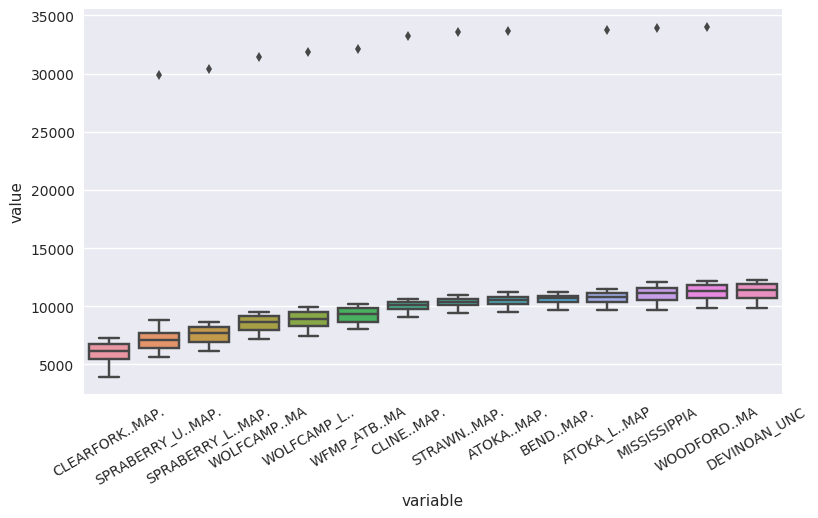

In [37]:
# Look at how the picks are mapped - depthwise, TVD or MD ?
tmp = geo_train.loc[:,'CLEARFORK..MAP.':'DEVINOAN_UNC']
tmp_melted  = tmp.melt()
sns.set(rc={'figure.figsize':(9,5)})
ax = sns.boxplot(x='variable',y='value',data=tmp_melted,)
x =ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


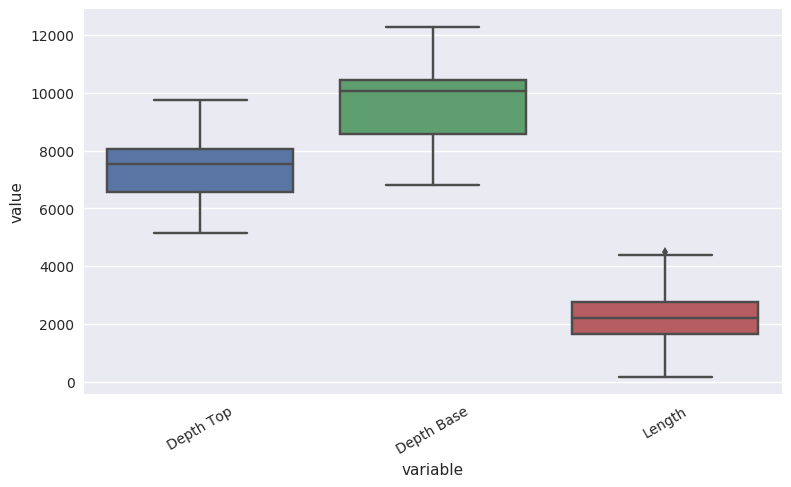

In [38]:
tmp = comp_train[['Depth Top','Depth Base','WellID']].groupby(['WellID'],as_index=False).aggregate({'Depth Top':'min','Depth Base':'max'})
tmp['Length'] = tmp['Depth Base'] - tmp['Depth Top']
tmp_melted  = tmp.melt(id_vars='WellID')
tmp_melted.sort_values('WellID')
#tmp
sns.set(rc={'figure.figsize':(9,5)})
ax = sns.boxplot(x='variable',y='value',data=tmp_melted,)
x =ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

This looks like a plausible length estimate; we should keep this dataframe for a merge with the base_train, and then see whether it correlates with EUR. **Need to normalize to completions length**

In [44]:
base_train_merged = pd.merge(base_train,tmp[['Length','WellID']],on = 'WellID')
base_train_merged = pd.merge(base_train_merged,comp_feats,on='WellID')

Looks like Frac.Stages and Nstages vary quite a bit... We'll keep them both, and RandomForest with large numbers of trees will figure which one is more likely to affect the EUR.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7288159e10>,
      dtype=object)

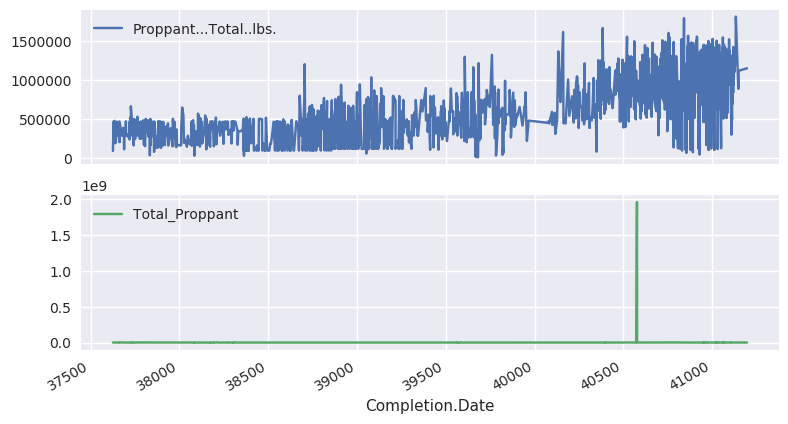

In [45]:
# PS. Total proppant should generally increase with time, reflecting the industry trend in Texas. 
# Interestingly enough, Total_Proppant calculated from the comp database does not show that behavior, while the Proppant...Total..lbs. does...
# Needs to be confirmed...
# Looks like the numbers were capped before date = 38500

base_train_merged =base_train_merged[base_train_merged['Proppant...Total..lbs.'] < 2e6].sort_values(by = 'Completion.Date')
base_train_merged[['Proppant...Total..lbs.','Total_Proppant','Completion.Date']].plot(x='Completion.Date',subplots=True)

In [48]:
# Export the base_merged_train.csv and use this for creating the training algorithm
base_train_merged.to_csv('base_train_merged.csv')